# **Identifying Shopping Trends using Data Analysis**

## *Project Description*


*   This project aims to analyze shopping trends using consumer transaction data.
*  **Dataset**: Shopping_trends_updated Data

*   **Attributes**: Customer ID, Age, Gender, Item purchased,Category,Location,Size,Color,Season,Review Rating,Shipping Type,Payment method








In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import plotly.express as px

In [2]:
shop=pd.read_csv("/content/shopping_trends_updated.csv")

In [3]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shop.shape

(3900, 18)

In [5]:
shop.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [6]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [7]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


#### describe the above output


*    Age: min age:18  and max age: 70

*   Purchase Amount: min amount:20(USD) and max amount:100(USD)
*   Review Rating: min rating:2.5 and max rating:5.0








In [8]:
object_columns = shop.select_dtypes(include=['object'])

In [9]:
print("Unique values in object columns:")
for column in object_columns.columns:
    unique_values = object_columns[column].unique()
    print(f"unique values of this column: {unique_values[:5]}\n")

Unique values in object columns:
unique values of this column: ['Male' 'Female']

unique values of this column: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers']

unique values of this column: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

unique values of this column: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon']

unique values of this column: ['L' 'S' 'M' 'XL']

unique values of this column: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal']

unique values of this column: ['Winter' 'Spring' 'Summer' 'Fall']

unique values of this column: ['Yes' 'No']

unique values of this column: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping']

unique values of this column: ['Yes' 'No']

unique values of this column: ['Yes' 'No']

unique values of this column: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer']

unique values of this column: ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly']



In [10]:
shop.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [11]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [12]:
shop_dup=shop[shop.duplicated()]
shop_dup.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


### As can see on above the program there is no duplicate value

In [13]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


#### There is no null value or missing values

Question -1
#### What is the overall distribution of customer ages in the dataset?




In [14]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [15]:
shop['Age'].mean()

44.06846153846154

In [16]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged Adults
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged Adults


In [18]:
figure = px.histogram(shop , y = 'Age' , x = 'Age_category')
figure.show()

### *The overall distribution of customer ages in the dataset indicates an average age of 44 years*

Question-2
#### How does the average purchase amount vary across different product categories?

In [19]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [20]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [21]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


In [22]:
fig = px.bar(shop.groupby('Category', as_index=False)['Purchase Amount (USD)'].mean(), x='Category', y='Purchase Amount (USD)', text_auto=True, color='Category');
fig.show()

Question-3
#### Which gender has the highest number of purchases?

In [23]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [24]:
shop.groupby('Gender').size()

,0
Gender,
Female,1248
Male,2652


Text(0.5, 0, 'Gender')

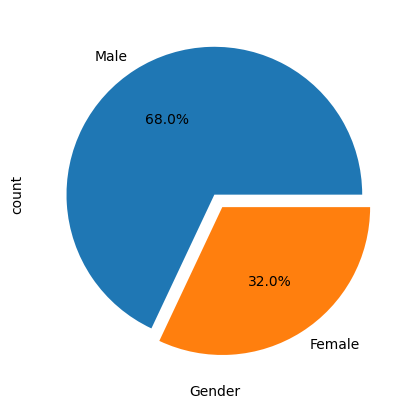

In [25]:
data=shop["Gender"].value_counts()
data.plot(kind='pie',explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel("Gender")

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

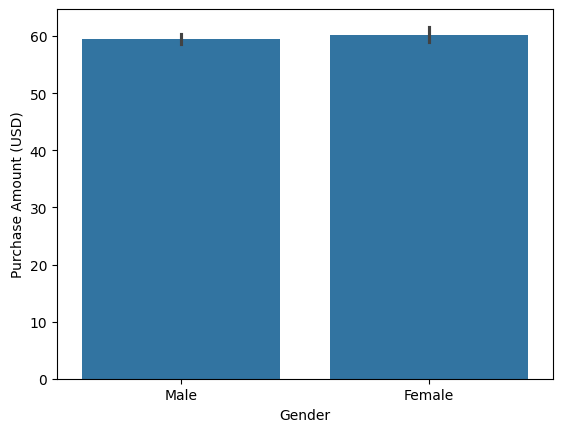

In [26]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

Question-4
#### What are the most commonly purchased items in each category?

In [27]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [28]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

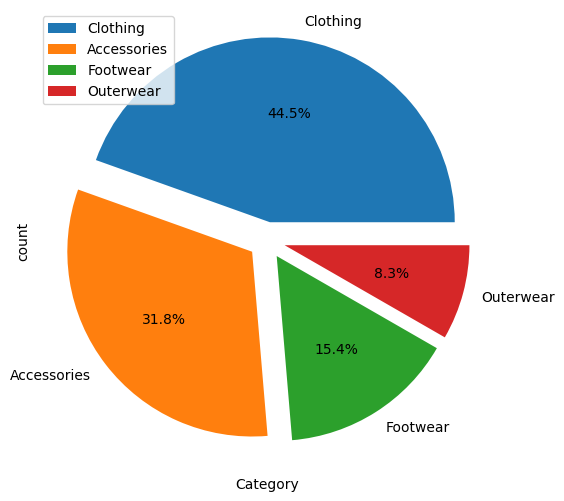

In [29]:
plt.figure(figsize=(20,6))
data=shop['Category'].value_counts()
explode = [0.1]*len(data)
data.plot(kind='pie',explode=explode,autopct='%1.1f%%')
plt.xlabel('Category')
plt.legend()
plt.show()

Question-5
#### Are there any specific seasons or months where customer spending is significantly higher?

In [30]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [31]:
shop['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [32]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )

fig.show()

Question-6
#### What is the average rating given by customers for each product category?

In [33]:
shop_group = shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_group)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


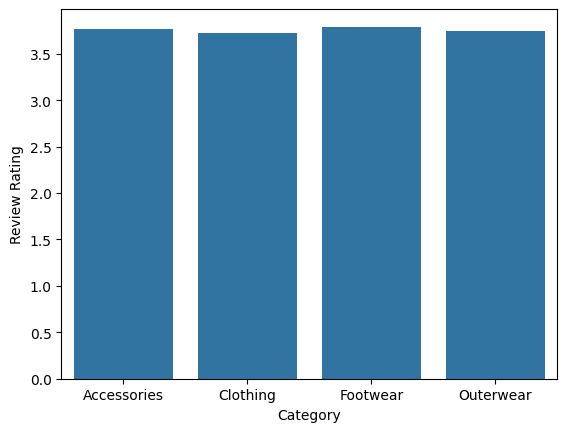

In [34]:
sns.barplot(x='Category', y='Review Rating', data=shop_group)
plt.show()

queston-7
#### Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [35]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
shop.groupby('Subscription Status').size()

,0
Subscription Status,
No,2847
Yes,1053


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

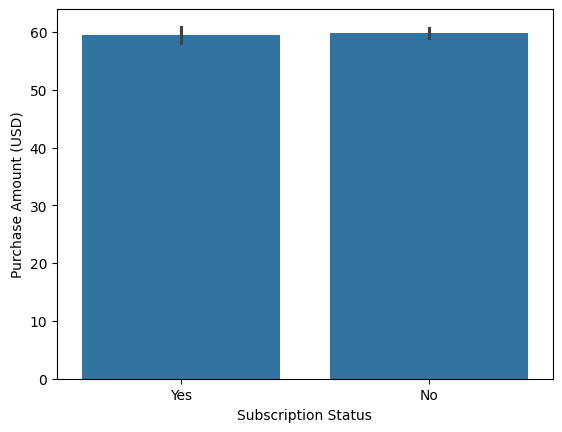

In [37]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [38]:
shop['Purchase Amount (USD)'].sum()

233081

In [39]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


Question-8
#### Which payment method is the most popular among customers?

In [40]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


In [41]:
fig = px.pie(shop.groupby('Payment Method').size().reset_index(name='Count'), values='Count', names='Payment Method', title='Most Popular Payment Methods', color_discrete_sequence=px.colors.qualitative.Vivid);
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

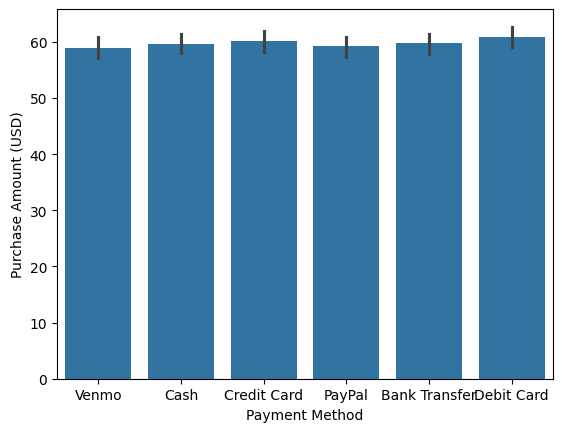

In [42]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

Question-9
#### Do customers who use promo codes tend to spend more than those who don't?

In [43]:
promo_analysis = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).reset_index()
print(promo_analysis)


  Promo Code Used       mean     sum  count
0              No  60.130454  133670   2223
1             Yes  59.279070   99411   1677


In [44]:
fig = px.bar(shop.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index(), x='Promo Code Used', y='Purchase Amount (USD)', title='Average Spending: Promo Code Users vs Non-Users', color='Promo Code Used', text_auto=True);
fig.show()

Question-10
#### How does the frequency of purchases vary across different age groups?

In [45]:
shop.groupby('Frequency of Purchases')['Age'].mean()

,Age
Frequency of Purchases,
Annually,44.666084
Bi-Weekly,43.201097
Every 3 Months,43.407534
Fortnightly,43.586716
Monthly,44.283906
Quarterly,44.685613
Weekly,44.649351


In [46]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [47]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [48]:
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Question-11
#### Are there any correlations between the size of the product and the purchase amount?

In [49]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [50]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [51]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

Question-12
#### Which shipping type is preferred by customers for different product categories?

In [52]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [53]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [54]:
shipping_preference = shop.groupby(['Category', 'Shipping Type']).size().reset_index(name='Count')


In [55]:
fig = px.bar(shipping_preference, x='Category', y='Count', color='Shipping Type', title='Preferred Shipping Types by Product Category', text_auto=True)
fig.show()

Question-13
#### How does the presence of a discount affect the purchase decision of customers?

In [56]:
shop.groupby('Discount Applied').size()

,0
Discount Applied,
No,2223
Yes,1677


In [57]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [58]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [59]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')
fig.show()

Question-14
#### Are there any specific colors that are more popular among customers?

In [60]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


In [61]:
px.histogram(shop , x = 'Color')

Question-15
#### What is the average number of previous purchases made by customers?

In [62]:
shop['Previous Purchases'].mean()

25.35153846153846

Question-16
#### How does the purchase amount differ based on the review ratings given by customers?

In [63]:
ratings_analysis = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()

In [64]:
fig = px.bar(ratings_analysis, x='Review Rating', y='Purchase Amount (USD)', title='Purchase Amount vs Customer Review Ratings', text_auto=True, color='Review Rating')
fig.show()

Question-17
#### Are there any noticeable differences in purchase behavior between different locations?

In [65]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [66]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [67]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

Question-18
#### Is there a relationship between customer age and the category of products they purchase?

In [68]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [69]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

Question-19
#### How does the average purchase amount differ between male and female customers?

In [70]:
shop_group=shop.groupby('Gender')['Purchase Amount (USD)'].mean()
shop_group

,Purchase Amount (USD)
Gender,
Female,60.249199
Male,59.536199


In [71]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [72]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

Question-20
#### How effective are discounts and promo codes in driving sales?

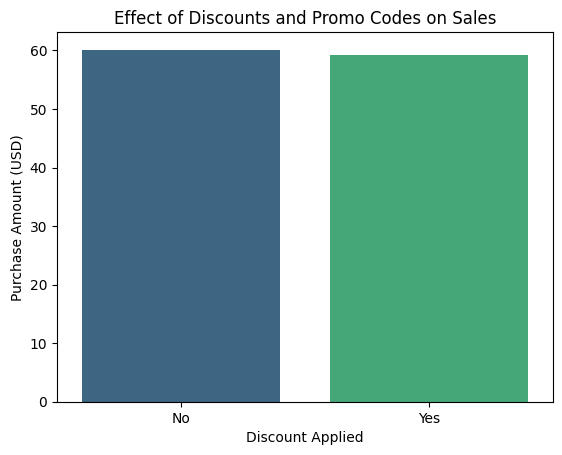

In [73]:
discount_stats = shop.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().reset_index()
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', hue='Promo Code Used', data=discount_stats, palette='viridis');
plt.title('Effect of Discounts and Promo Codes on Sales');
plt.show()


Question-21
#### Which features in the dataset are most strongly correlated with the purchase amount?

In [74]:
shop_numeric= shop.select_dtypes(include=['int64', 'float64'])

In [75]:
corr_matrix = shop_numeric.corr()

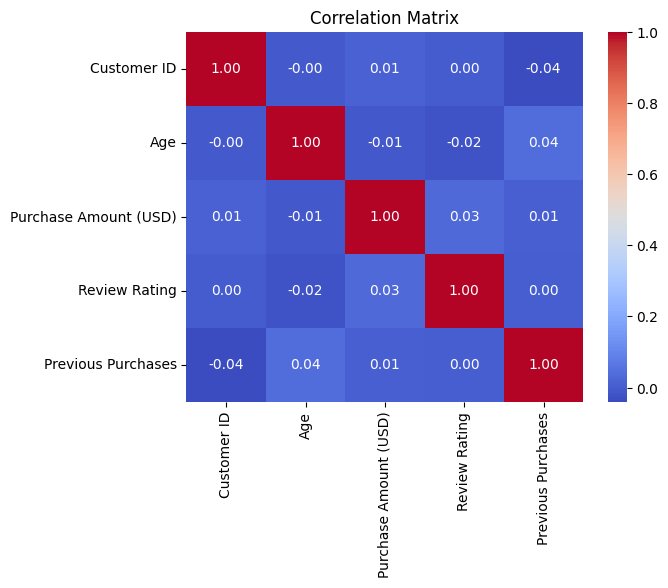

In [76]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Matrix');
plt.show()

#Thank you